In [147]:
#importer les bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

In [148]:
#charger le dataset
df = pd.read_csv('Churn_Modelling.csv')

In [149]:
#afficher les 5 premières lignes du dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [150]:
#afficher dimension du dataset
df.shape

(10000, 14)

In [151]:
#afficher les informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [152]:
#afficher les statistiques descriptives du dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [153]:
#afficher les statistiques descriptives du dataset
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [154]:
#afficher les valeurs manquantes
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [155]:
#afficher les valeurs dupliquées
df.duplicated().sum()

0

In [156]:
#afficher les valeurs uniques de chaque colonne
df.nunique()


RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [157]:
# voir les valeurs uniques de la colonne 'exited'
df['Exited'].unique()


array([1, 0], dtype=int64)

In [158]:
#voir nombre de 0 et de 1 dans la colonne 'exited'
df['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

c'est clair que notre base est unbalanced avec 1 est minoritaire 

<Axes: xlabel='Exited', ylabel='count'>

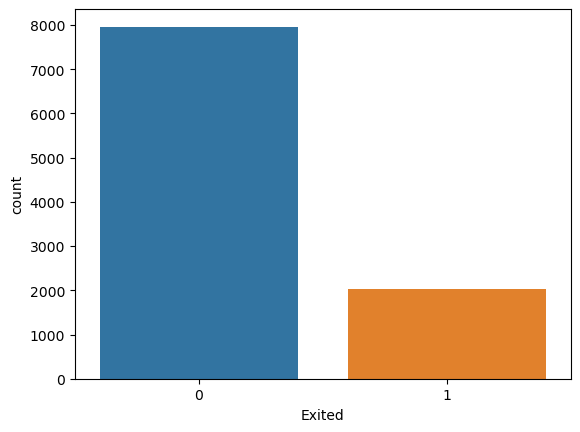

In [159]:
#visualiser les valeurs de la colonne 'exited'
sns.countplot(x='Exited', data=df)


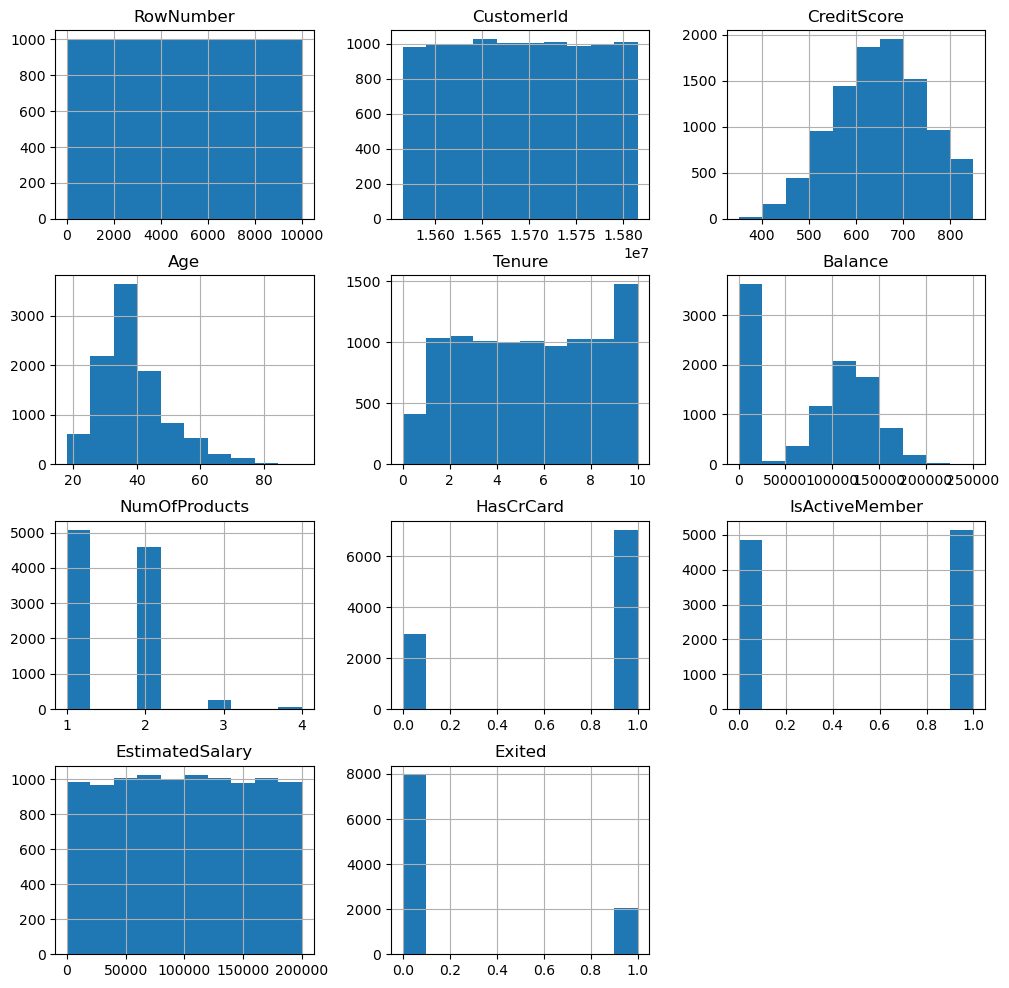

In [160]:
#visualiser la distrubtion des tous les variables numériques
df.hist(figsize=(12,12))
plt.show()


Comme première observation, il existe quelques caractéristiques présentant une distribution uniforme et d'autres normale.

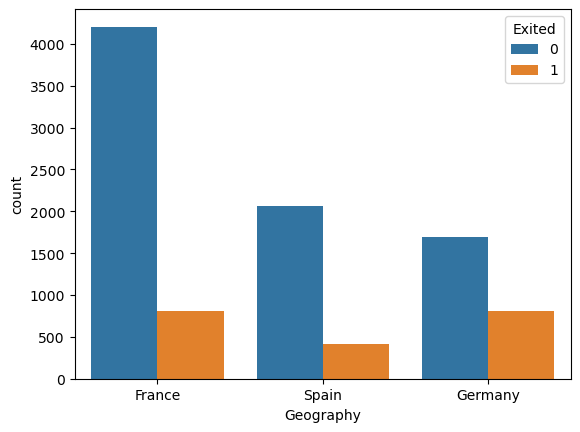

In [161]:
#visualiser la distribution de la colonne 'Exited' par rapport à la colonne 'Geography'
sns.countplot(x='Geography', hue='Exited', data=df)
plt.show()


In [162]:
# # visualiser la distribution avec pairplot de toutes les variables numériques
# sns.pairplot(df, hue='Exited')
# plt.show()


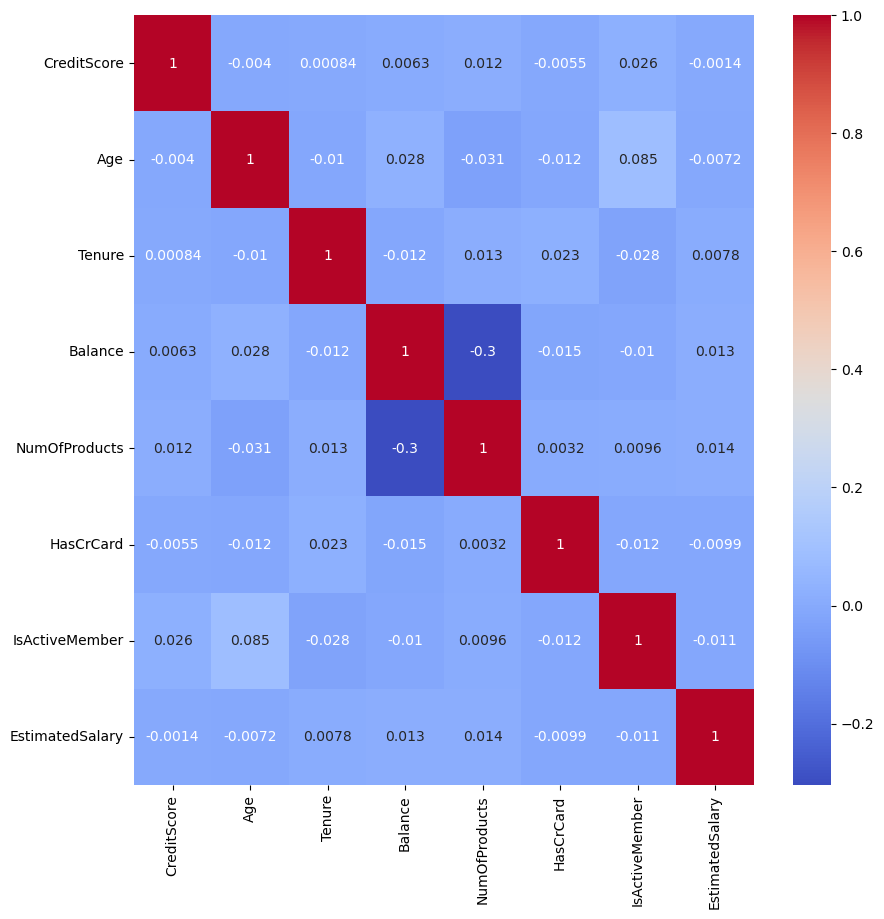

In [163]:
# creer une fonction de voir les var num et catégoriques
def num_cat(data):
    num = data.select_dtypes(include=[np.number])
    cat = data.select_dtypes(exclude=[np.number])
    return num, cat
# appliquer la fonction
num, cat = num_cat(df)
num.columns
cat.columns
#creer dataframes pour les variables numériques et catégoriques
df_num = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
df_cat = df
#afficher les 5 premières lignes du dataframe des variables numériques

# faire la corrélation entre les variables numériques
correlation = df_num.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [164]:
cat

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [165]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


C:\Users\User\AppData\Local\Temp\ipykernel_58672\3552035604.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_58672\3552035604.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_58672\3552035604.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


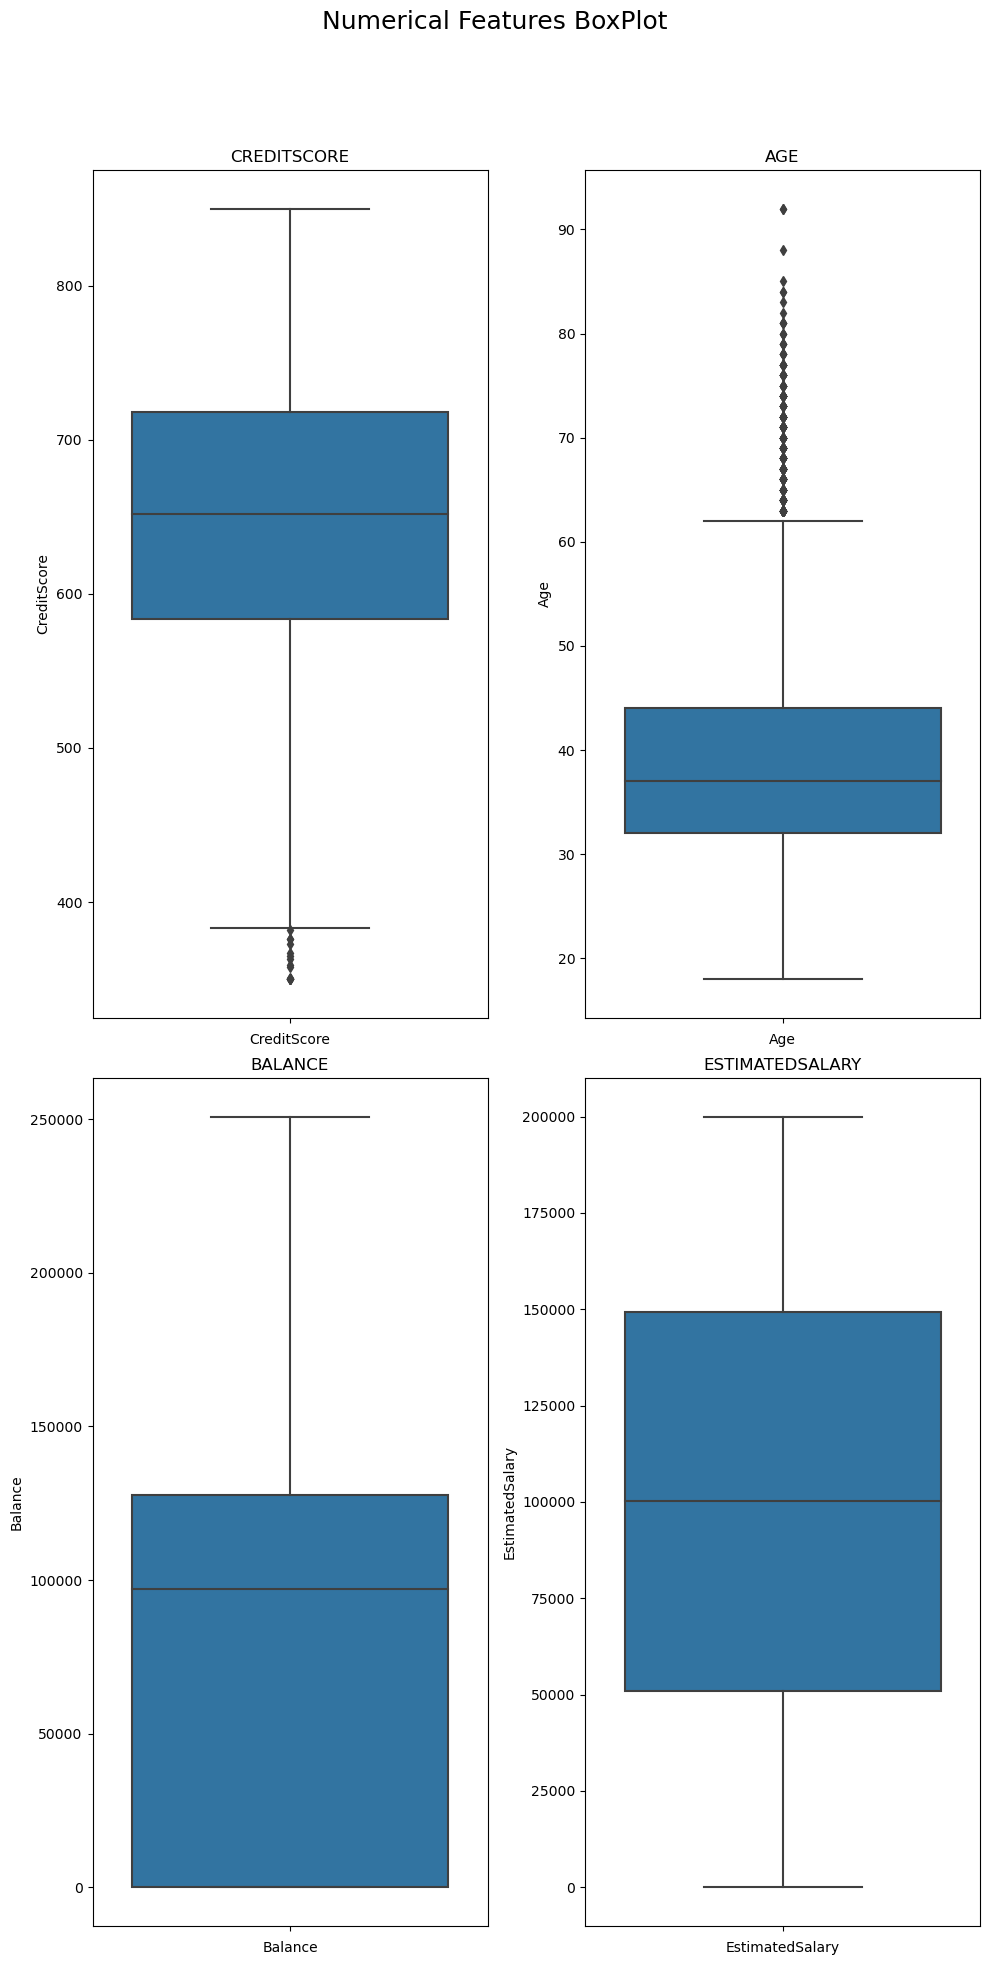

In [178]:
# Age et CreditScore features ont des outliers

num_feat = ['CreditScore','Age','Balance','EstimatedSalary']

plt.figure(figsize=(10,20))
for i,col in enumerate(num_feat):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = df[col])
    plt.suptitle("Numerical Features BoxPlot",size = 18)
    plt.xlabel(f"{col}")
    plt.title(f"{col.upper()}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 


In [179]:
#supprimer les colonnes 'RowNumber', 'CustomerId' et 'Surname'
df1 = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#tratier les valeurs aberratntes de la colonne 'Age' et 'CreditScore'

In [188]:

#calculer les valeurs de Q1 et Q3
Q1 = df1['Age'].quantile(0.25)
Q3 = df1['Age'].quantile(0.75)
#calculer l'écart interquartile
IQR = Q3 - Q1
#calculer les valeurs de Q1 et Q3
Q11 = df1['CreditScore'].quantile(0.25)
Q33= df1['CreditScore'].quantile(0.75)
#calculer l'écart interquartile
IQR2 = Q33 - Q11
#filtrer les valeurs aberratntes
df2 = df1[(df1['Age'] >= Q1 - 1.5*IQR) & (df1['Age'] <= Q3 + 1.5*IQR)]
df3 = df2[(df2['CreditScore'] >= Q11 - 1.5*IQR2) & (df2['CreditScore'] <= Q33 + 1.5*IQR2)]
#dans le meme  dataframe on a supprimé les valeurs aberratntes
df3.shape




(9626, 11)

C:\Users\User\AppData\Local\Temp\ipykernel_58672\4078040559.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


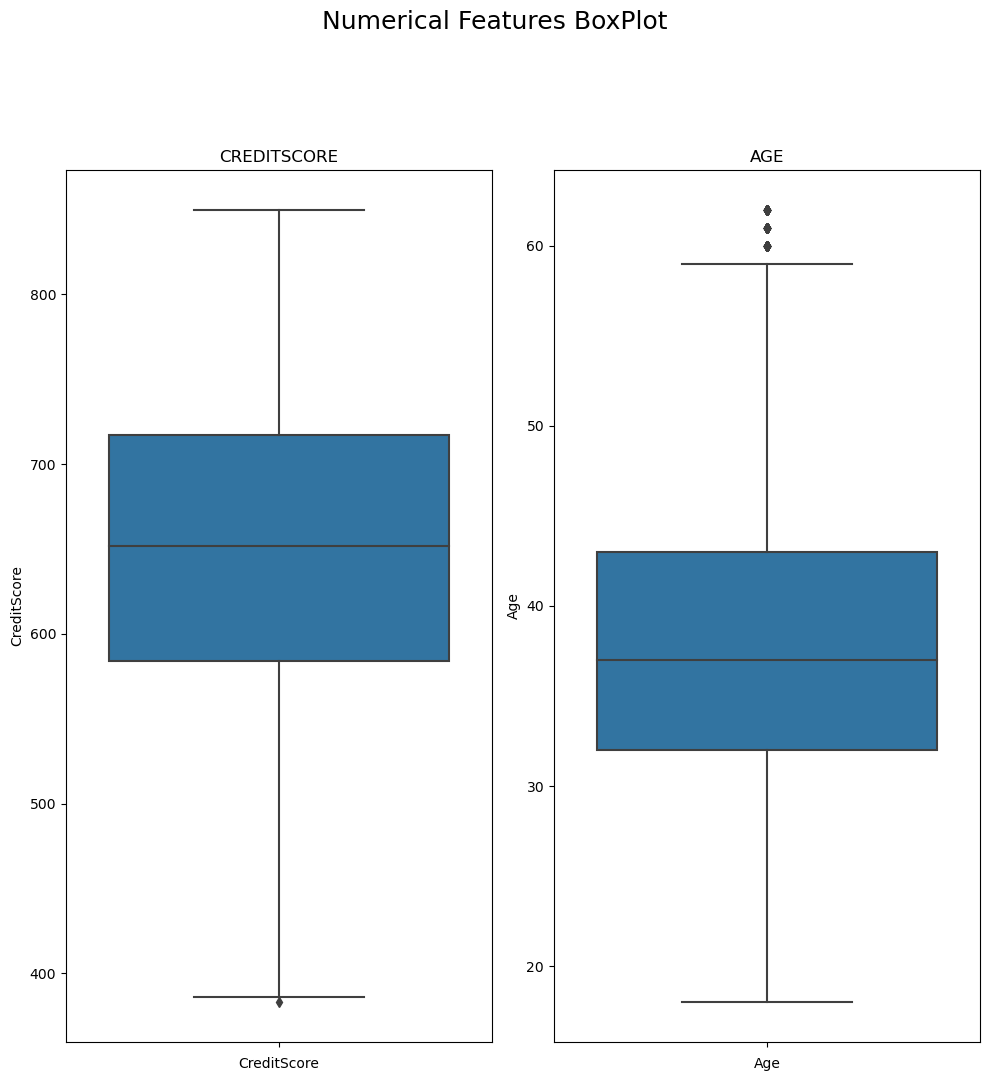

In [191]:


num_feat = ['CreditScore','Age']

plt.figure(figsize=(10,20))
for i,col in enumerate(num_feat):
    plt.subplot(2,2,i+1)
    sns.boxplot(y = df3[col])
    plt.suptitle("Numerical Features BoxPlot",size = 18)
    plt.xlabel(f"{col}")
    plt.title(f"{col.upper()}")
    plt.tight_layout()
    plt.subplots_adjust(top=0.9) 


In [185]:
#afficher les types des variables
df3.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [193]:
#encoder les variables catégoriques
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# LabelEncoder = Gender =[Female,Male] ==> Female =0, Male = 1
le = LabelEncoder()

le_col= ["Gender","Geography"]
for col in le_col:
    df3[col] = le.fit_transform(df3[col])
df3.head()

C:\Users\User\AppData\Local\Temp\ipykernel_58672\3666865887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = le.fit_transform(df3[col])
C:\Users\User\AppData\Local\Temp\ipykernel_58672\3666865887.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[col] = le.fit_transform(df3[col])


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [194]:
#afficher les variables avec nombre de valeurs uniques
df3.nunique()

CreditScore         450
Geography             3
Gender                2
Age                  45
Tenure               11
Balance            6147
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9625
Exited                2
dtype: int64

In [195]:
df3.shape

(9626, 11)

In [196]:
## Diviser le dataset en variables dépendantes et indépendantes
X = df3.drop('Exited', axis=1)
y = df3['Exited']


In [197]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [199]:
X.shape

(9626, 10)

In [198]:
y.shape

(9626,)

In [200]:
# importer le train_test_split
from sklearn.model_selection import train_test_split
#diviser le dataset en training et test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [201]:
# importer StandardScaler
from sklearn.preprocessing import StandardScaler
#instancier le StandardScaler
sc = StandardScaler()
#normaliser les données
X_train_sc = sc.fit_transform(X_train)
X_test_sc= sc.transform(X_test)


In [202]:
#impoter normalizer
from sklearn.preprocessing import Normalizer
#instancier le normalizer
norm = Normalizer()
#normaliser les données
X_train_norm = norm.fit_transform(X_train)
X_test_norm = norm.transform(X_test)


PS: puisque notre donnes comptre des distrubtioons variantes donc on doit test standerscaler et nomrlizer 

In [209]:
# importer le modèle de régression logistique
from sklearn.linear_model import LogisticRegression
#instancier le modèle
log_reg = LogisticRegression()
#entrainer le modèle
log_reg.fit(X_train_sc, y_train)
#faire des prédictions
y_pred = log_reg.predict(X_test_sc)
#afficher la matrice de confusion
confusion_matrix(y_test, y_pred)



array([[1476,   55],
       [ 286,  109]], dtype=int64)

<Axes: >

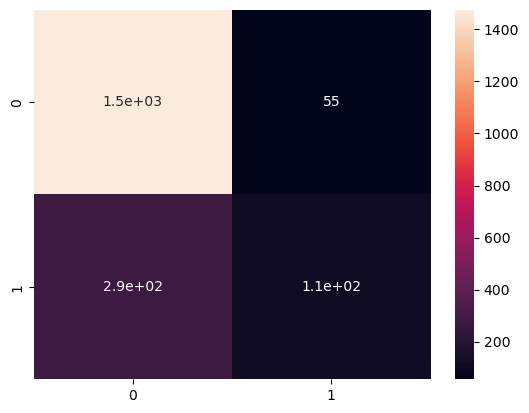

In [210]:
#afficher dans une heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [211]:
#afficher accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8229491173416407

In [204]:
# importer la fonction de classification_report
from sklearn.metrics import classification_report
#afficher le classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1531
           1       0.66      0.28      0.39       395

    accuracy                           0.82      1926
   macro avg       0.75      0.62      0.64      1926
weighted avg       0.80      0.82      0.79      1926



In [212]:
#test avec normalized data
# importer le modèle de régression logistique
from sklearn.linear_model import LogisticRegression
#instancier le modèle
log_reg = LogisticRegression()
#entrainer le modèle
log_reg.fit(X_train_norm, y_train)
#faire des prédictions
y_pred = log_reg.predict(X_test_norm)
#afficher la matrice de confusion
confusion_matrix(y_test, y_pred)


array([[1531,    0],
       [ 395,    0]], dtype=int64)

In [213]:
#afficher accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.7949117341640706

In [214]:
#afficher le classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89      1531
           1       0.00      0.00      0.00       395

    accuracy                           0.79      1926
   macro avg       0.40      0.50      0.44      1926
weighted avg       0.63      0.79      0.70      1926



c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
